In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = pd.read_csv("predictiondata.csv")

In [3]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors
0,221900.0,3,1.00,1180,1.0
1,538000.0,3,2.25,2570,2.0
2,180000.0,2,1.00,770,1.0
3,604000.0,4,3.00,1960,1.0
4,510000.0,3,2.00,1680,1.0


In [4]:
data.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'], dtype='object')

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors
count,1.377000e+03,1377.000000,1377.000000,1377.000000,1377.000000
mean,5.374944e+05,3.395788,2.071532,2082.501089,1.418301
std,3.924578e+05,0.892188,0.766096,909.100466,0.495297
min,8.250000e+04,1.000000,0.500000,520.000000,1.000000
25%,3.150000e+05,3.000000,1.500000,1450.000000,1.000000
50%,4.500000e+05,3.000000,2.000000,1920.000000,1.000000
75%,6.400000e+05,4.000000,2.500000,2500.000000,2.000000
max,5.350000e+06,8.000000,6.000000,8000.000000,3.000000


Text(0, 0.5, 'Count')

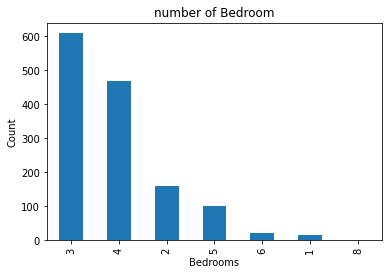

In [7]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')


Text(0.5, 1.0, 'Price vs Square Feet')

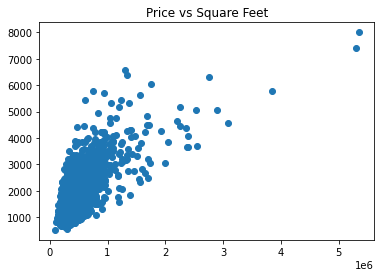

In [8]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

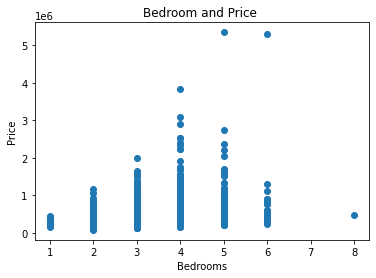

In [9]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

<AxesSubplot:>

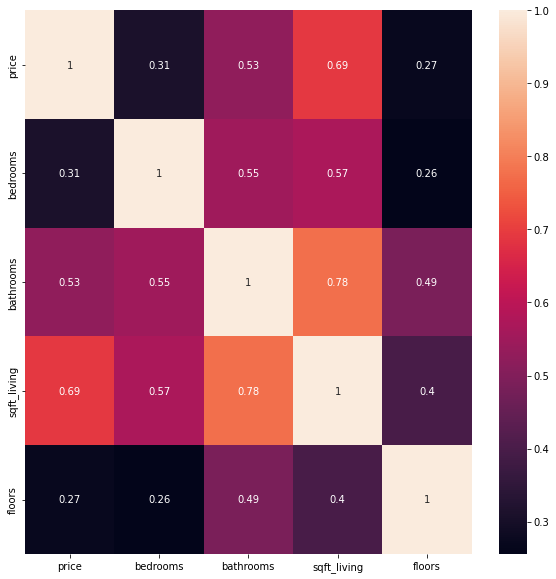

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

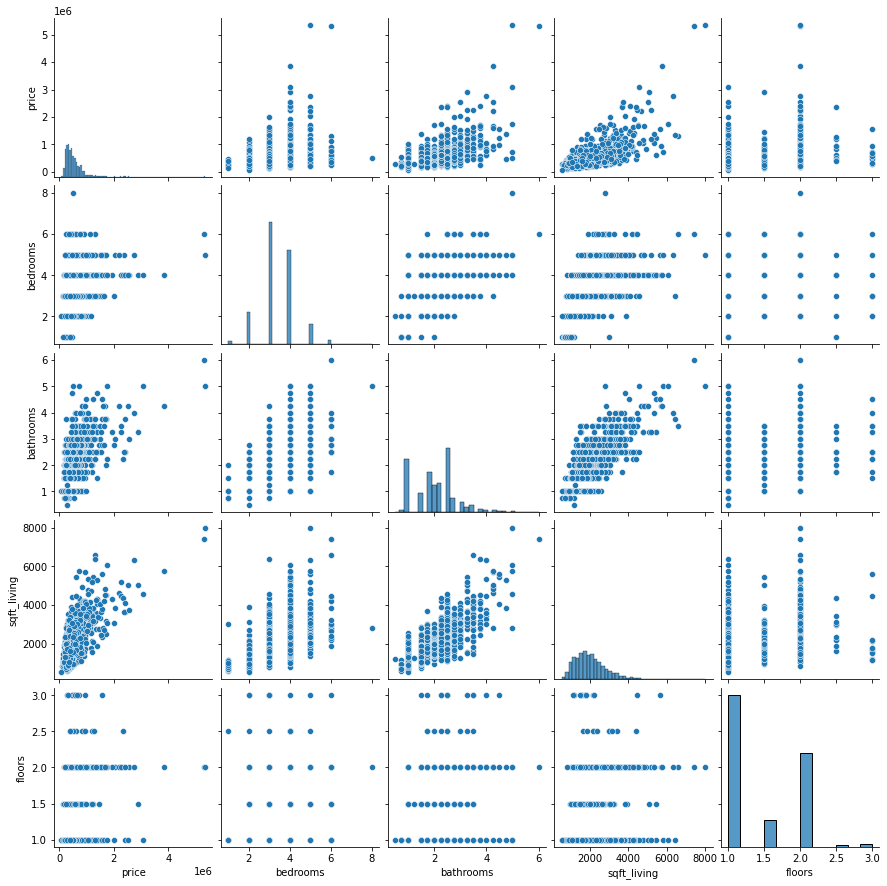

In [20]:
sns.pairplot(data)

In [14]:
#linear Regression
x= data[[ 'bedrooms', 'bathrooms', 'sqft_living', 'floors']]
y=data['price']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=101)

In [16]:
ln = LinearRegression() 

In [23]:
ln.fit(x_train,y_train)

LinearRegression()

In [17]:
coeff_df= pd.DataFrame(ln,x.columns,columns=['Coefficient'])

In [24]:
coeff_df

,Coefficient
bedrooms,LinearRegression()
bathrooms,LinearRegression()
sqft_living,LinearRegression()
floors,LinearRegression()


In [26]:
predictions = ln.predict(x_test)

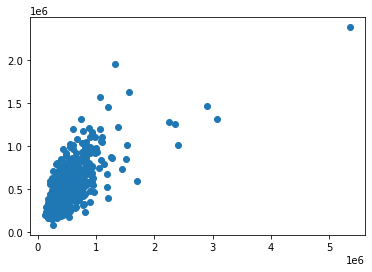

In [27]:
plt.scatter(y_test,predictions)

c:\users\abhijeet singh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

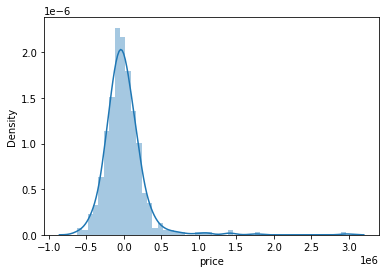

In [30]:
sns.distplot((y_test-predictions),bins=50)